In [7]:
from read_tiles import TissueDataset
import h5py
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HDF5_FOLDER = '/media/nico/data/fourthbrain/project/output_CAMELYON16/'

In [3]:
train_data = TissueDataset(HDF5_FOLDER,  percentage=0.5, first_part=True)
# val_data = TissueDataset(path=HDF5_FILE, percentage=0.5, first_part=False)

In [4]:
x, y = train_data.get_batch(num_neg=3, num_pos=3)
print(x.shape)
print(y)

(6, 256, 256, 3)
[1. 0. 0. 0. 1. 1.]


In [5]:
x

array([[[[0.84705882, 0.6       , 0.70588235],
         [0.80392157, 0.55294118, 0.65490196],
         [0.72941176, 0.48235294, 0.58823529],
         ...,
         [0.92941176, 0.83921569, 0.87843137],
         [1.        , 0.91764706, 0.94901961],
         [1.        , 0.9254902 , 0.9372549 ]],

        [[0.84705882, 0.6       , 0.70588235],
         [0.89803922, 0.64705882, 0.75294118],
         [0.80784314, 0.56078431, 0.66666667],
         ...,
         [0.9254902 , 0.83529412, 0.86666667],
         [1.        , 0.90588235, 0.92941176],
         [1.        , 0.89803922, 0.91764706]],

        [[0.88627451, 0.63921569, 0.75294118],
         [0.98431373, 0.7372549 , 0.84313725],
         [0.87843137, 0.63137255, 0.7372549 ],
         ...,
         [0.9372549 , 0.85882353, 0.86666667],
         [0.94509804, 0.84705882, 0.8627451 ],
         [0.91372549, 0.80784314, 0.82745098]],

        ...,

        [[0.82745098, 0.63137255, 0.7372549 ],
         [0.90588235, 0.69803922, 0.80784314]

(2, 256, 256, 3)


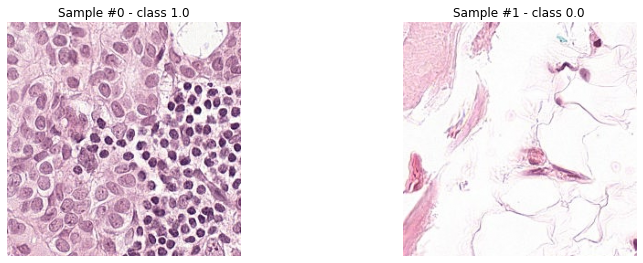

In [9]:
plt.figure(figsize=(12,4))

itera = train_data.generator(num_neg=1, num_pos=1, data_augm=True)
for x, y in itera:
    print(x.shape)
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - class {}'.format(i, y[i]))
        ax.imshow(x[i])
        ax.axis('off') 
    break # generate yields infinite random samples, so we stop after first